In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dslrpp.tools import align
from dslrpp.prepare.process import _debugImage, Monochrome

def rand(l, r, shape=()):
    return np.random.random_sample(shape) * (r-l) + l

def generate_noise(im):
    im += rand(0, 0.2, shape=im.shape)
    return im

def generate_star(im, xs, ys, w):
    xs -= w//2
    ys -= w//2
    star = rand(0.8, 1, shape=(w,w))
    ls = np.linspace(-1, 1, num=w)
    limb = np.zeros_like(star)
    x, y = np.meshgrid(ls, ls)
    limb += np.real(np.sqrt(1-x**2-y**2 + 0j))
    star *= limb
    im[xs:xs+w, ys:ys+w] += star
    return im

In [2]:
im1, im2, im3 = np.zeros((300, 300)), np.zeros((300, 300)), np.zeros((300, 300))
im1, im2, im3 = generate_noise(im1), generate_noise(im2), generate_noise(im3)

im1 = generate_star(im1, 100, 200, 10)
im1 = generate_star(im1, 150, 240, 5)
im1 = generate_star(im1, 260, 170, 7)

im2 = generate_star(im2, 108, 203, 9)
im2 = generate_star(im2, 158, 244, 5)
im2 = generate_star(im2, 269, 173, 7)

im3 = generate_star(im3, 120, 205, 9)
im3 = generate_star(im3, 161, 248, 5)
im3 = generate_star(im3, 273, 175, 7)

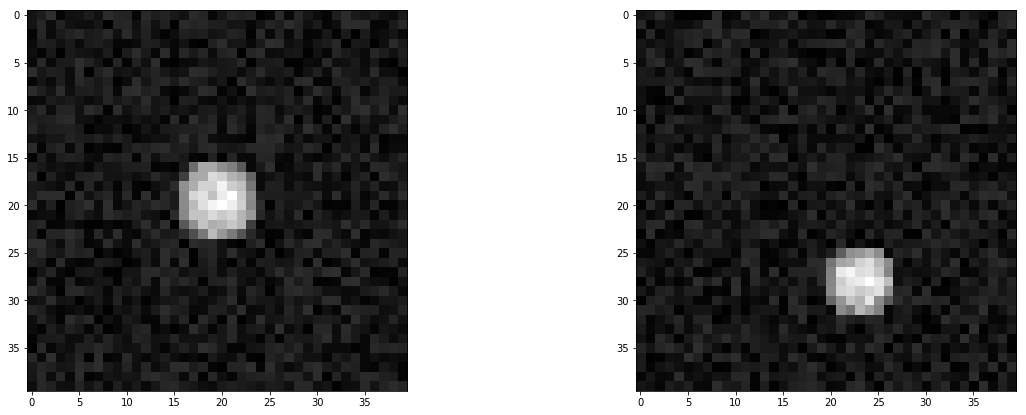

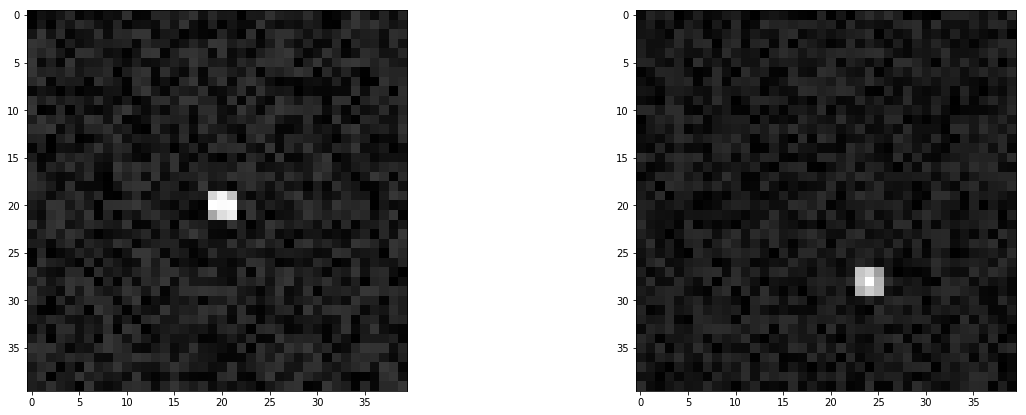

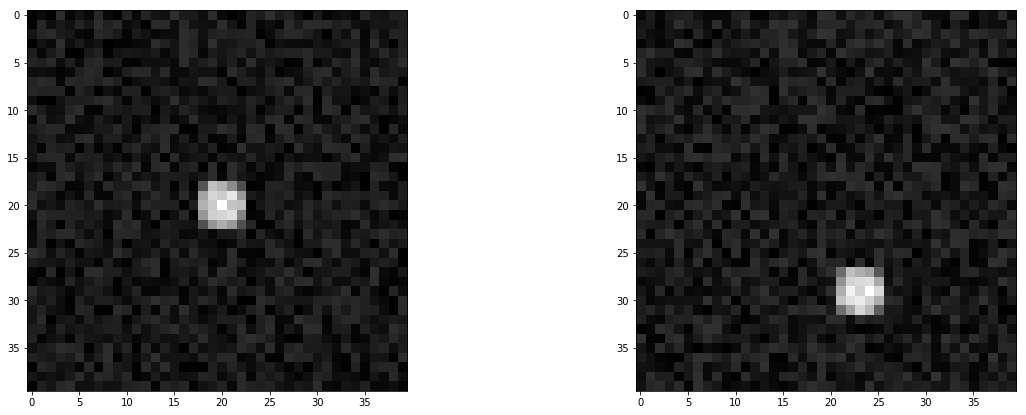

[[0, 0], [9, 3]]


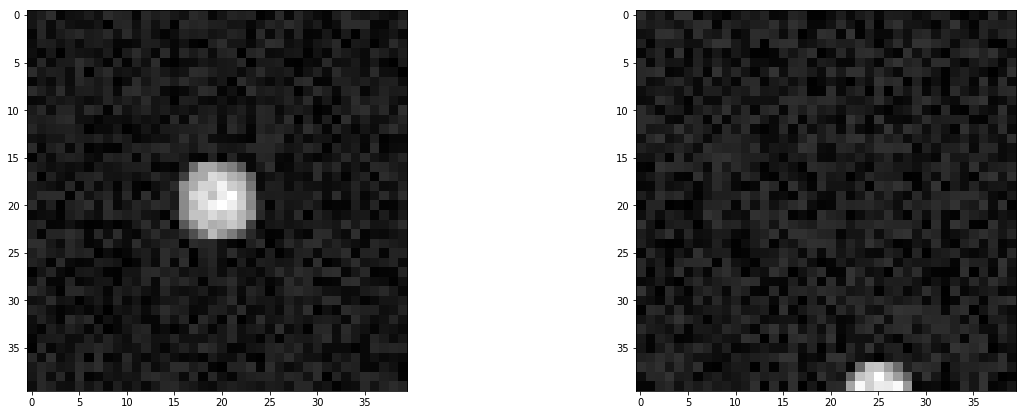

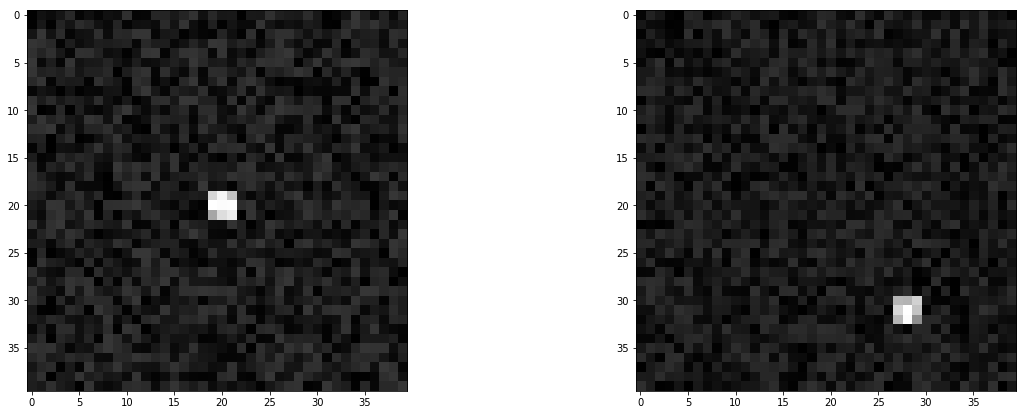

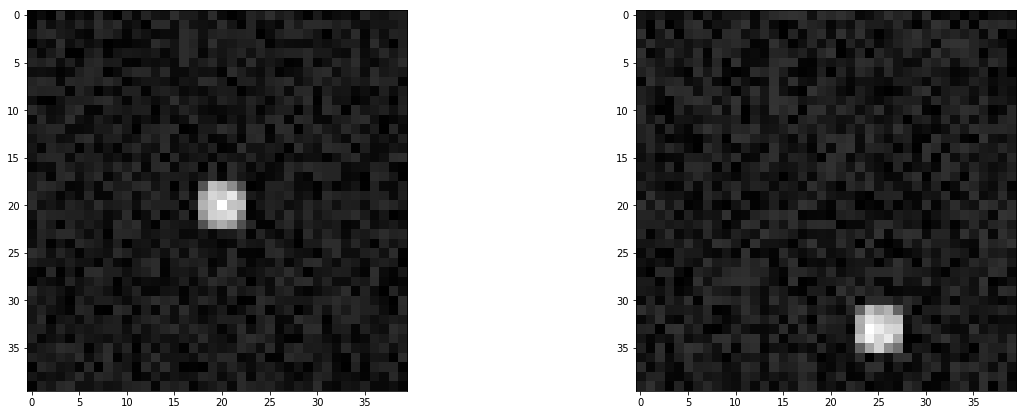

[[0, 0], [9, 3], [13, 5]]
[[0, 0], [9, 3], [13, 5]]
<class 'int'> 3
<class 'int'> 5


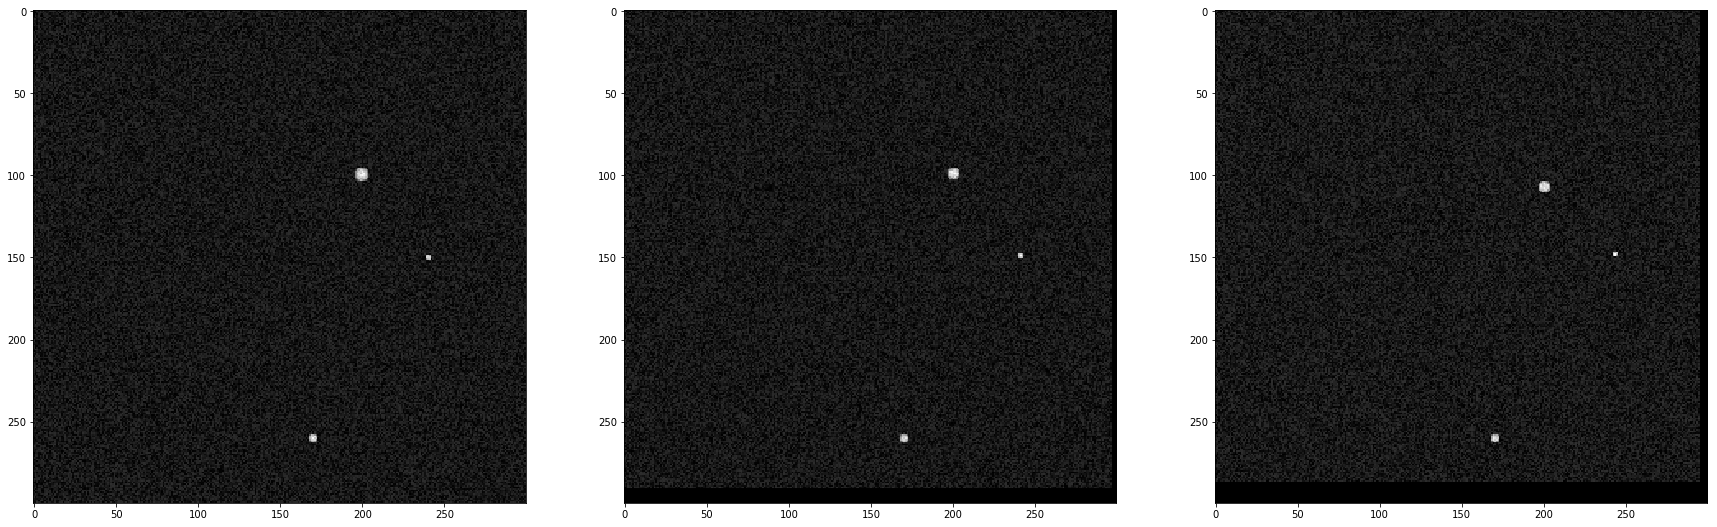

In [3]:
im1 = _debugImage(im1)
im2 = _debugImage(im2)
im3 = _debugImage(im3)

im1.add_star(100, 200, 10)
im1.add_star(150, 240, 5)
im1.add_star(260, 170, 7)

aligneds = align.align_imgs(im1, im2, im3, hh=50, hw=50)

fig, (i1, i2, i3) = plt.subplots(ncols=3, figsize=(30, 12))

i1.imshow(aligneds[0].imdata, cmap='gray')
i2.imshow(aligneds[1].imdata, cmap='gray')
i3.imshow(aligneds[2].imdata, cmap='gray')

plt.show()